# Lecture 6: Partial Dependence Plots

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets

# These are new imports for the partial dependence plots
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from mpl_toolkits.mplot3d import Axes3D

# This import allows us to pull in a data set on California housing
# for this exercise
from sklearn.datasets.california_housing import fetch_california_housing

You can read more on partial dependence plots [here](http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html).  Let's load a dataset on California housing broken out by census block.  Info on the dataset can be found here: [http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

In [3]:
# Load the data set
cal_housing = datasets.california_housing.fetch_california_housing()

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to C:\Users\cck023.DS\scikit_learn_data


In [4]:
# Description of the the data set
print(cal_housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




It's not clear here, but the unit of observation for this data set is a census block group (collection of houses).

In [5]:
# Get the names of the features described in the above description
cal_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
names = cal_housing.feature_names
names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

The target is the average home values in the census block in units of $100k.

In [7]:
cal_housing.target

array([ 4.526,  3.585,  3.521, ...,  0.923,  0.847,  0.894])

In [8]:
# Look ata the data as a numpy array.  Each row is an observation,
# and each column is a predictor.
cal_housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ..., 
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

We'll make a train/test split and fit a gradient boosting trees regressor to the data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data, cal_housing.target, test_size=0.2)

In [10]:
gbt = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, loss='ls')
gbt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=4, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

The `plot_partial_dependence` function will plot several partial dependence plots for a given set of predictors.

In [11]:
# First, we specify the predictors for which we want to create a partial
# dependence plot.  We do so by indicating each feature's column index in the data that
# was used to train the model.  Note the tuple at the end below, which will give us a 
# 2-dimensional partial dependence plot 
features = [0, 5, 1, 2, (5, 1)]

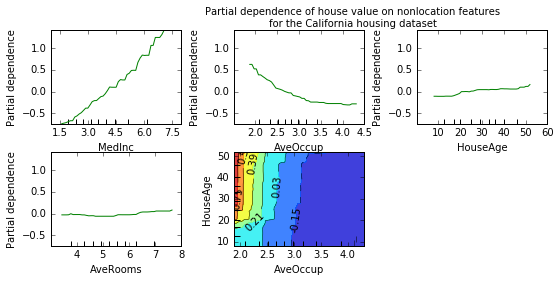

In [12]:
# Second, we run the calculations to get the partial dependence plots.
# The first argument is the model we're using, the second is the training data,
# the third is list of features for which we want partial dependence plots,
# the fourth is a list of names for the features (for labeling purposes),
# the fifth (n_job) allows for parallel processing, and
# the sixth (grid_resolution) is the number of values you want to evaluate the
# model at when creating the plot.
fig, axs = plot_partial_dependence(gbt, X_train, features, feature_names=names, n_jobs=4, grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
             'for the California housing dataset')
plt.subplots_adjust(top=0.9,left=-0.2) # Some formatting
fig = plt.figure()

As we might have expected, overall relationship between median income of house owners and value of a home is positive.  The second plot indicates that home value decreaes in the number of occupants, while the third plot shows little to no relationship between home age and home value.  Similarly, the fourth plot shows very little relationship between the average number of rooms and home value.  The fourth plot indicates that, even though there is a weak relationship between the age of a house and its value, older houses with fewer occupants do tend to be more much more valuable.

Finally, note that the vertical axes in the four one-dimensional partial dependence plots range from -0.5 up to 1.5, even though all values of the target (home value) were positive.  Python's partial dependence function automatically subtracts off the average value of the response (over the entire data set) when calculating the partial dependence function.  As a result, when the vertical axis is '0' in a partial dependence plot, this corresponds to the average value of the response in the training set.  Positive values are above the mean, and negative values are below the mean.